# 1.Import library

In [40]:
!pip install scikit-learn

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter





Defaulting to user installation because normal site-packages is not writeable


# 2.Dataset

## 2.1 Import dataset


In [41]:
df = pd.read_csv( 'D:/University/Summer semester 2024/DSS/DuDoanLoan.csv')
df.head()

,Age,Customer-Period,MaximumSpend(mil_VND),Monthly-Average-Spend(mil_VND),Level,Security-Asset,Internet-Banking,Credit-Card,Region,Loan-On-Card
0,36,9,529.0,10.12,2,0,0,0,1,1
1,29,4,506.0,11.50,3,0,0,0,1,1
2,47,21,634.8,14.72,1,0,0,0,2,0
3,57,33,561.2,27.60,1,1,1,1,1,0
4,56,30,726.8,28.06,1,0,0,0,2,1


In [42]:
df.shape

(1000, 10)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1000 non-null   int64  
 1   Customer-Period                 1000 non-null   int64  
 2   MaximumSpend(mil_VND)           1000 non-null   float64
 3   Monthly-Average-Spend(mil_VND)  1000 non-null   float64
 4   Level                           1000 non-null   int64  
 5   Security-Asset                  1000 non-null   int64  
 6   Internet-Banking                1000 non-null   int64  
 7   Credit-Card                     1000 non-null   int64  
 8   Region                          1000 non-null   int64  
 9   Loan-On-Card                    1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


In [44]:
df.describe()

,Age,Customer-Period,MaximumSpend(mil_VND),Monthly-Average-Spend(mil_VND),Level,Security-Asset,Internet-Banking,Credit-Card,Region,Loan-On-Card
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,45.373000,20.146000,475.939000,12.659200,2.024000,0.116000,0.606000,0.29200,1.978000,0.48000
std,11.456488,11.419505,241.502939,9.378971,0.839123,0.320385,0.488879,0.45491,0.797591,0.49985
min,23.000000,1.000000,36.800000,0.460000,1.000000,0.000000,0.000000,0.00000,1.000000,0.00000
25%,36.000000,10.750000,266.800000,5.060000,1.000000,0.000000,0.000000,0.00000,1.000000,0.00000
50%,45.000000,20.000000,496.800000,10.580000,2.000000,0.000000,1.000000,0.00000,2.000000,0.00000
75%,55.000000,30.000000,662.400000,18.400000,3.000000,0.000000,1.000000,1.00000,3.000000,1.00000
max,67.000000,42.000000,933.800000,46.000000,3.000000,1.000000,1.000000,1.00000,3.000000,1.00000


## 2.2 Cleaning data

In [45]:
print("Number of duplicates:", (df.duplicated()).sum())

Number of duplicates: 78


In [46]:
df = df.drop_duplicates()
df_duplicates = df.duplicated()
print("Number of duplicates after dropping duplicates:", df_duplicates.sum())

Number of duplicates after dropping duplicates: 0


# 3.Data analysis and Visualization

## 3.1.Numerical variables

### Histogram

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Customer-Period'}>,
        <Axes: title={'center': 'MaximumSpend(mil_VND)'}>],
       [<Axes: title={'center': 'Monthly-Average-Spend(mil_VND)'}>,
        <Axes: title={'center': 'Level'}>,
        <Axes: title={'center': 'Security-Asset'}>],
       [<Axes: title={'center': 'Internet-Banking'}>,
        <Axes: title={'center': 'Credit-Card'}>,
        <Axes: title={'center': 'Region'}>],
       [<Axes: title={'center': 'Loan-On-Card'}>, <Axes: >, <Axes: >]],
      dtype=object)

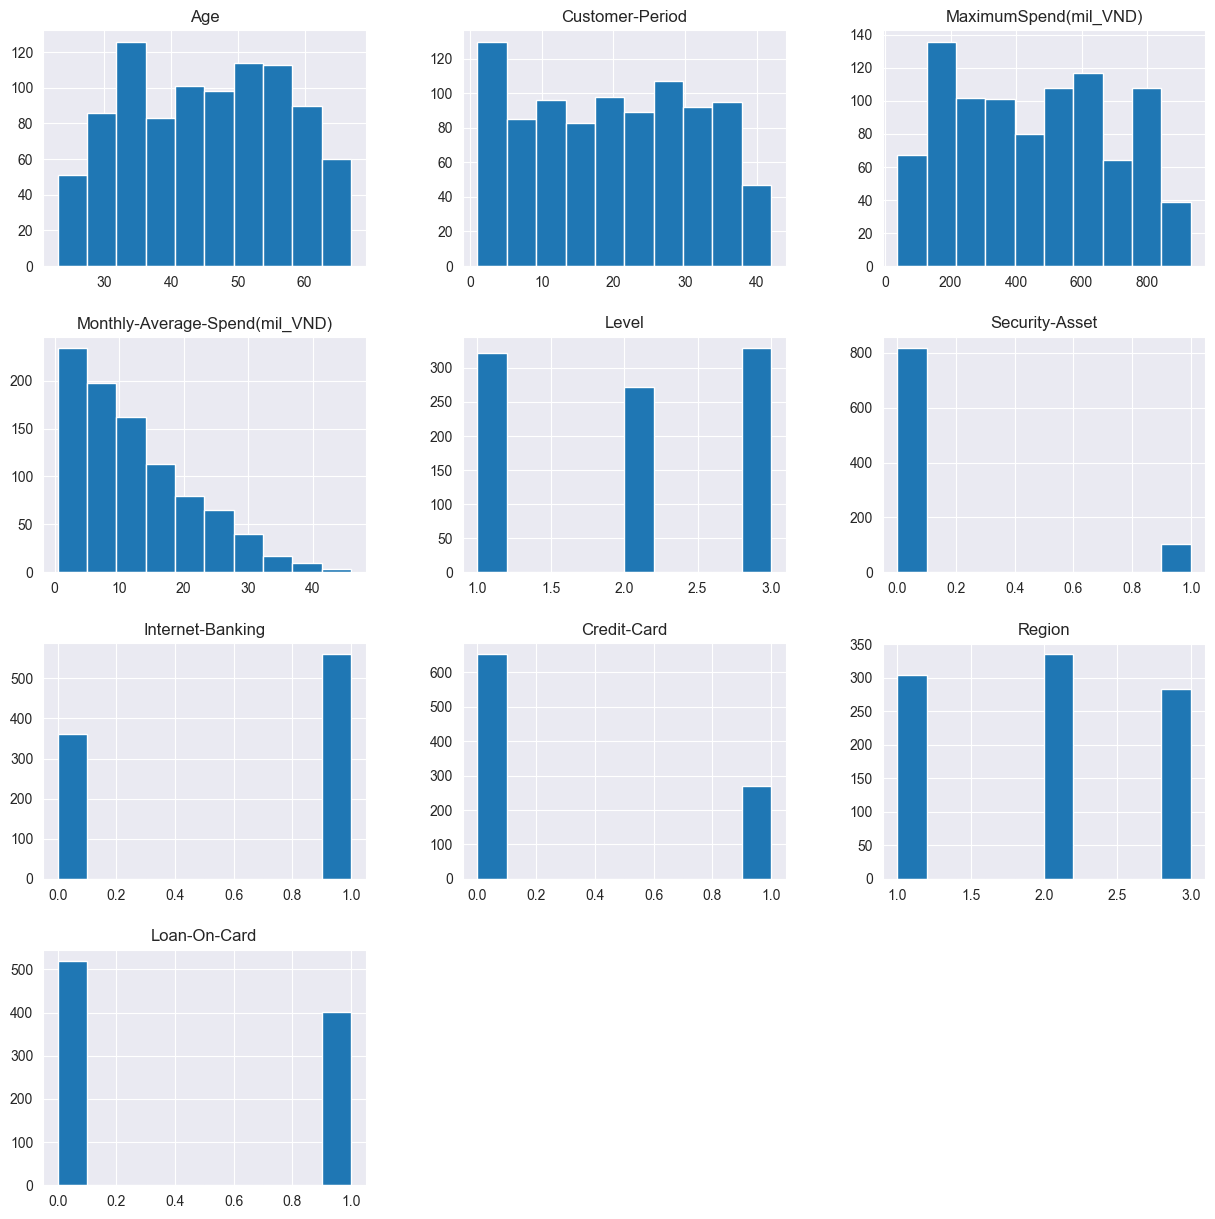

In [47]:
df.hist(figsize=(15, 15))

### Boxplot

#### a.Age

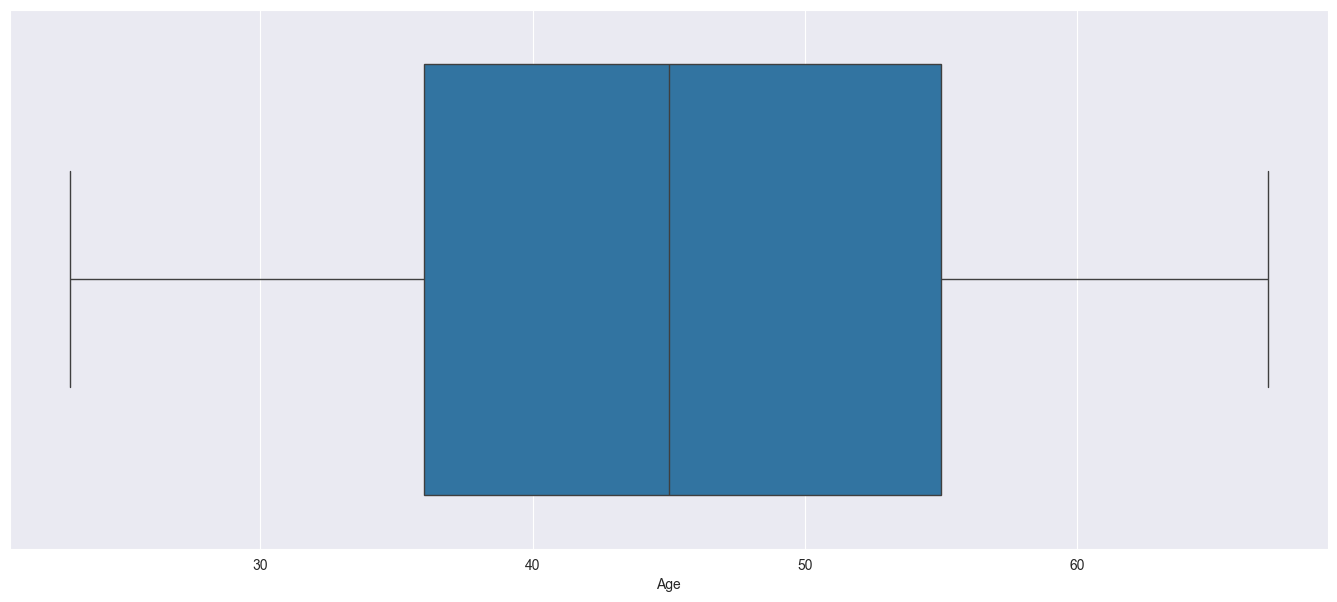

 Total Number of outliers in Age: 0


In [48]:
ffig, ax = plt.subplots(figsize=(17, 7))
sns.boxplot(x = 'Age', data=df,  orient='h')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Age'],25),np.percentile(df['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

#### b.Customer-Period

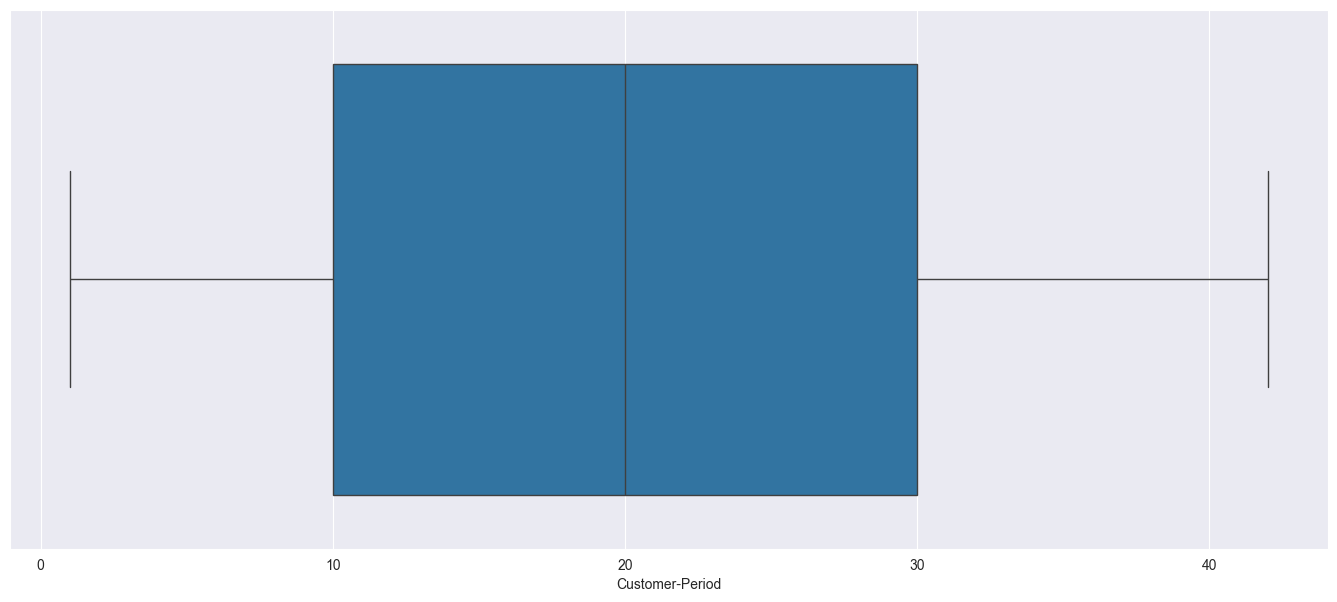

 Total Number of outliers in Customer-Period: 0


In [49]:
ffig, ax = plt.subplots(figsize=(17, 7))
sns.boxplot(x = 'Customer-Period', data=df,  orient='h')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Customer-Period'],25),np.percentile(df['Customer-Period'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Customer-Period'] if i < lower or i > upper]
print('{} Total Number of outliers in Customer-Period: {}'.format('\033[1m',len(Outliers)))



#### c.MaximumSpend(mil_VND)

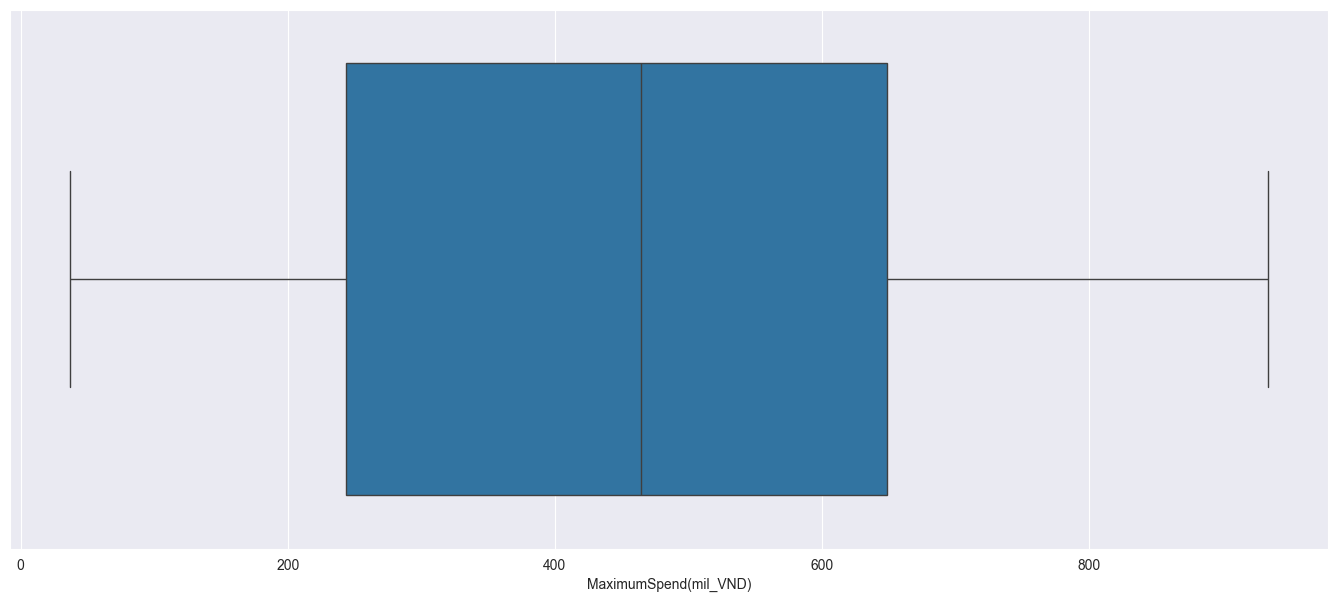

 Total Number of outliers in MaximumSpend(mil_VND): 0


In [50]:
ffig, ax = plt.subplots(figsize=(17, 7))
sns.boxplot(x = 'MaximumSpend(mil_VND)', data=df,  orient='h')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['MaximumSpend(mil_VND)'],25),np.percentile(df['MaximumSpend(mil_VND)'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['MaximumSpend(mil_VND)'] if i < lower or i > upper]
print('{} Total Number of outliers in MaximumSpend(mil_VND): {}'.format('\033[1m',len(Outliers)))



#### d.Monthly-Average-Spend(mil_VND)

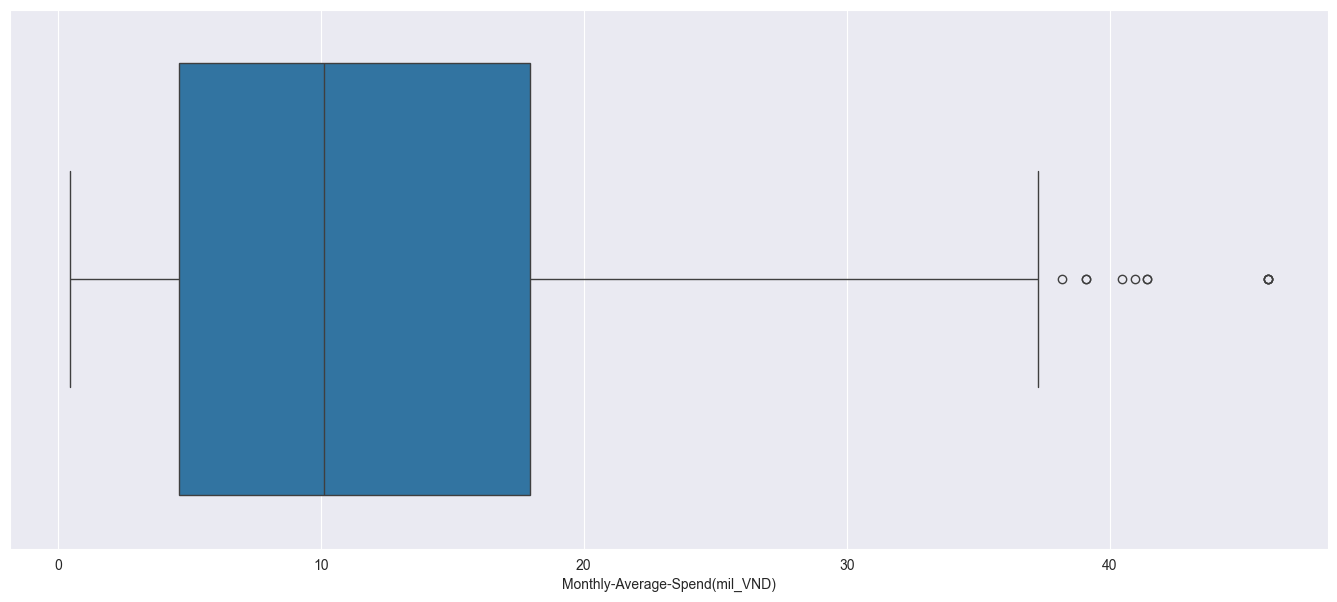

 Total Number of outliers in Monthly-Average-Spend(mil_VND): 11


In [51]:
ffig, ax = plt.subplots(figsize=(17, 7))
sns.boxplot(x = 'Monthly-Average-Spend(mil_VND)', data=df,  orient='h')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Monthly-Average-Spend(mil_VND)'],25),np.percentile(df['Monthly-Average-Spend(mil_VND)'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Monthly-Average-Spend(mil_VND)'] if i < lower or i > upper]
print('{} Total Number of outliers in Monthly-Average-Spend(mil_VND): {}'.format('\033[1m',len(Outliers)))



## 3.2.Categoriacal variables

#### a.Level

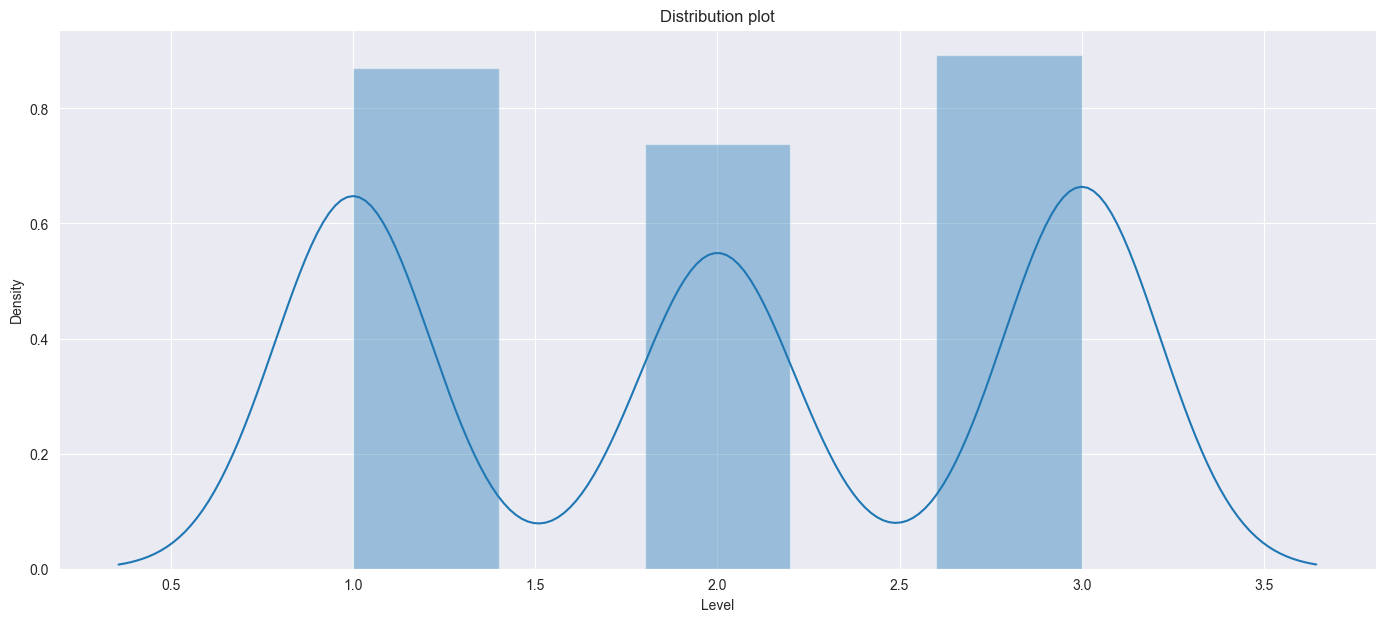

In [52]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(df['Level'], ax=ax)
ax.set_title('Distribution plot')
plt.show()


#### b.Security-Asset

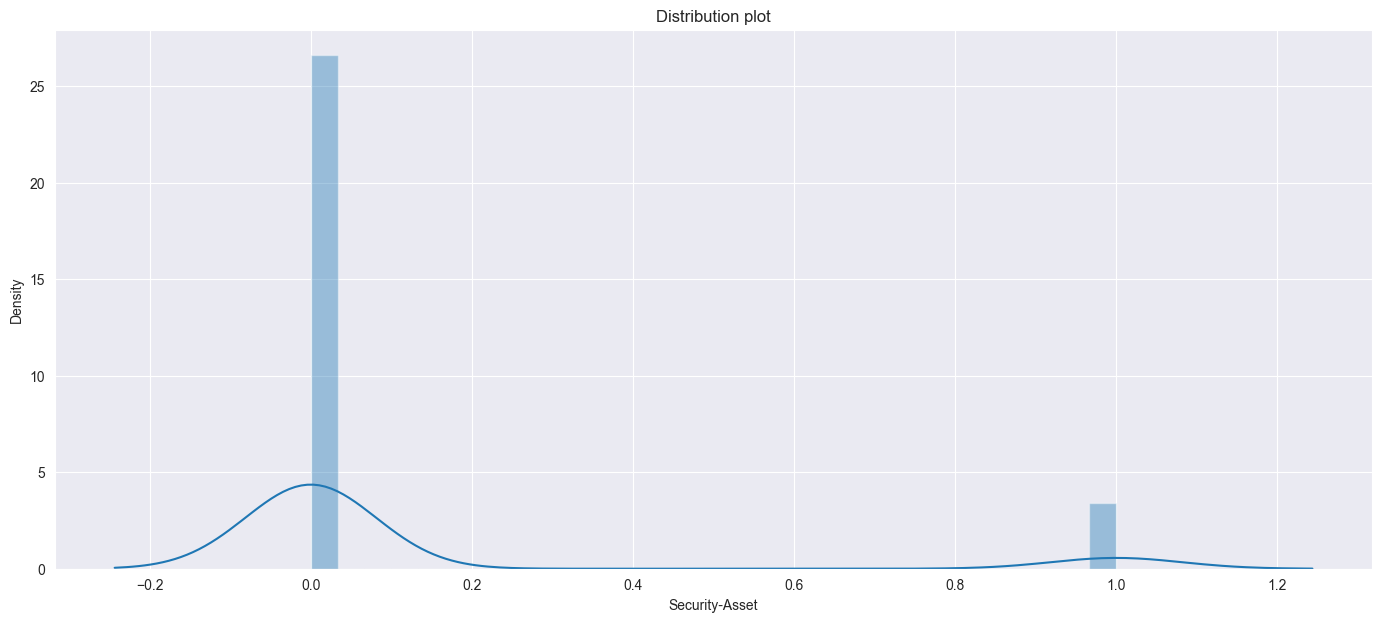

In [53]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(df['Security-Asset'], ax=ax)
ax.set_title('Distribution plot')
plt.show()


#### c.Internet-Banking

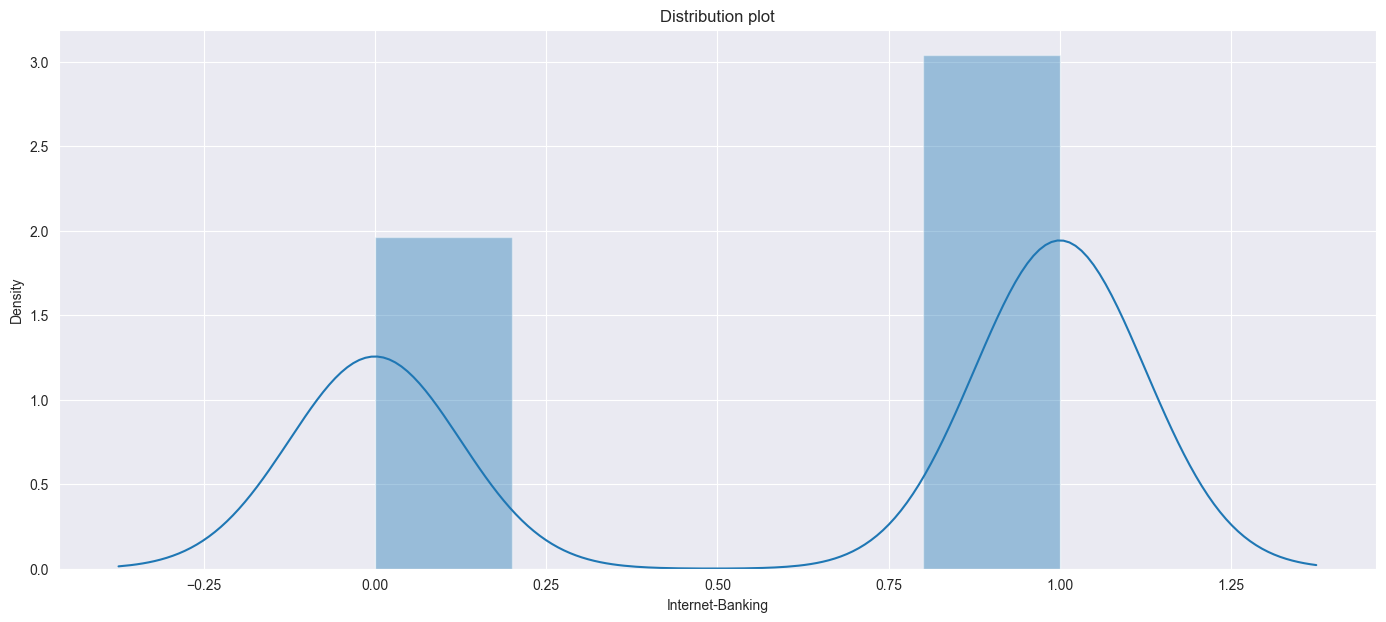

Internet-Banking
1    560
0    362
Name: count, dtype: int64


In [54]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(df['Internet-Banking'], ax=ax)
ax.set_title('Distribution plot')
plt.show()
print(df['Internet-Banking'].value_counts())

#### d.Credit-Card

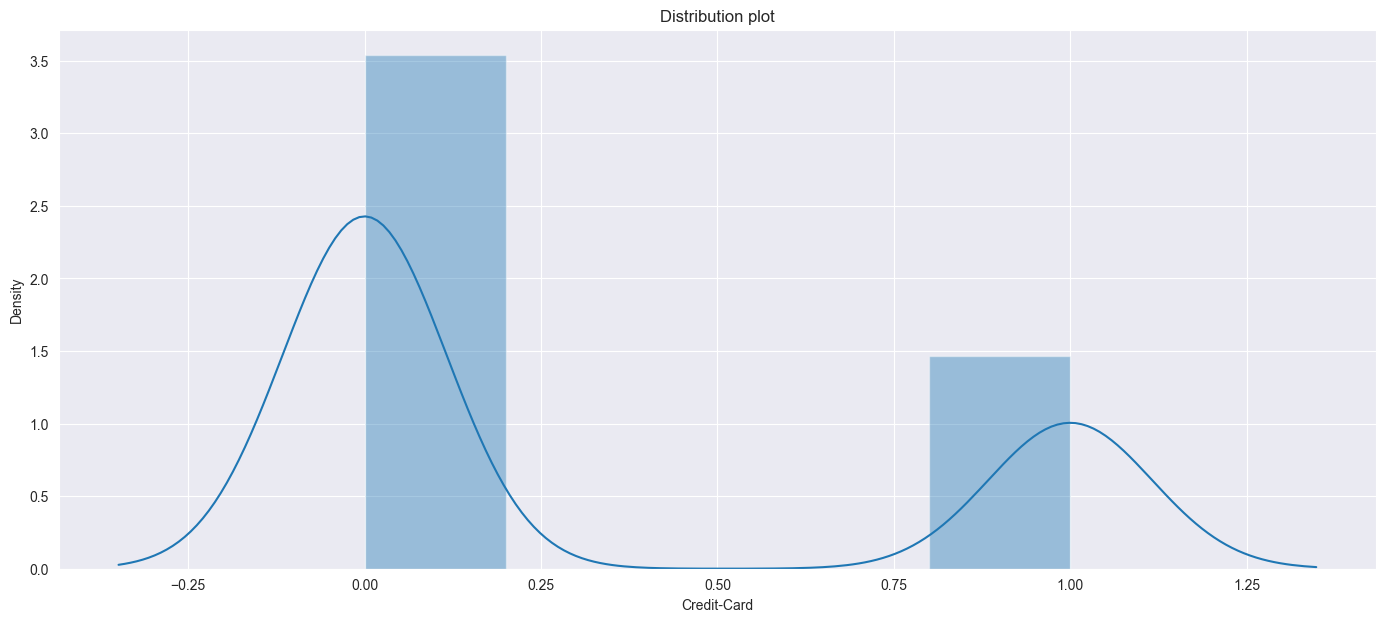

Credit-Card
0    652
1    270
Name: count, dtype: int64


In [55]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(df['Credit-Card'], ax=ax)
ax.set_title('Distribution plot')
plt.show()
print(df['Credit-Card'].value_counts())

#### e.Region

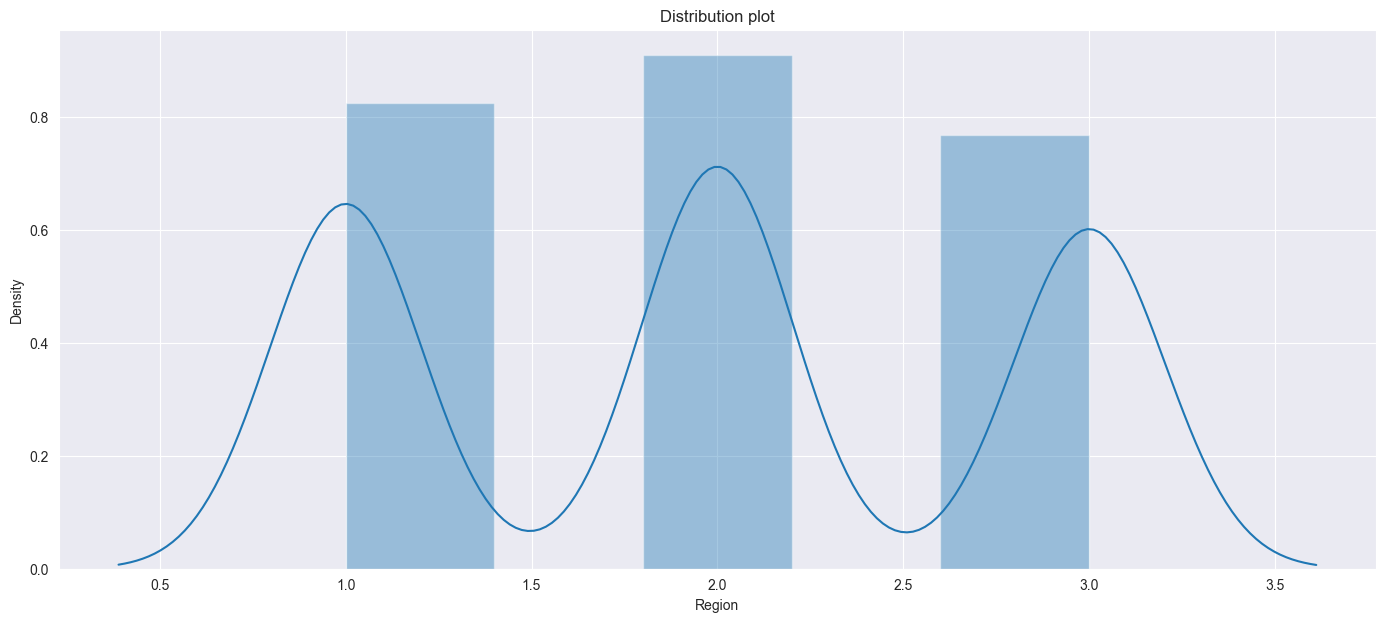

Region
2    335
1    304
3    283
Name: count, dtype: int64


In [56]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(df['Region'], ax=ax)
ax.set_title('Distribution plot')
plt.show()
print(df['Region'].value_counts())

#### f.Loan-On-Card

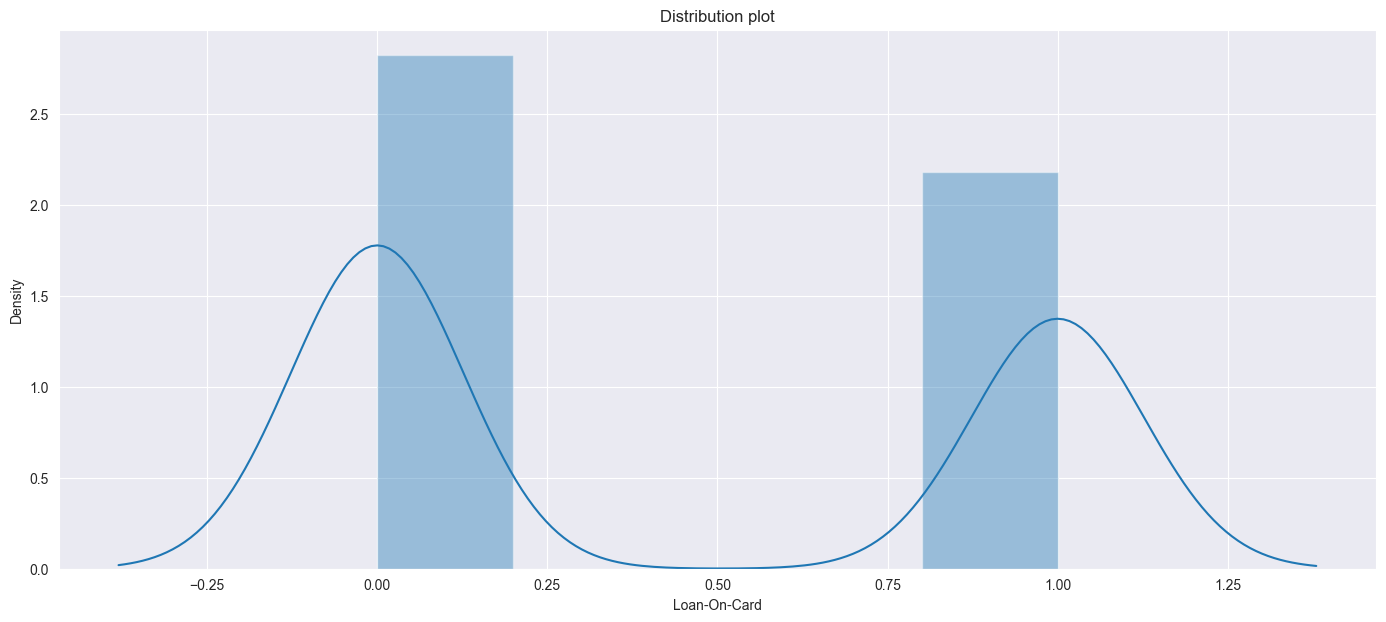

Loan-On-Card
0    520
1    402
Name: count, dtype: int64


In [57]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(df['Loan-On-Card'], ax=ax)
ax.set_title('Distribution plot')
plt.show()
print(df['Loan-On-Card'].value_counts())

## 3.3. Bi variate Analysis


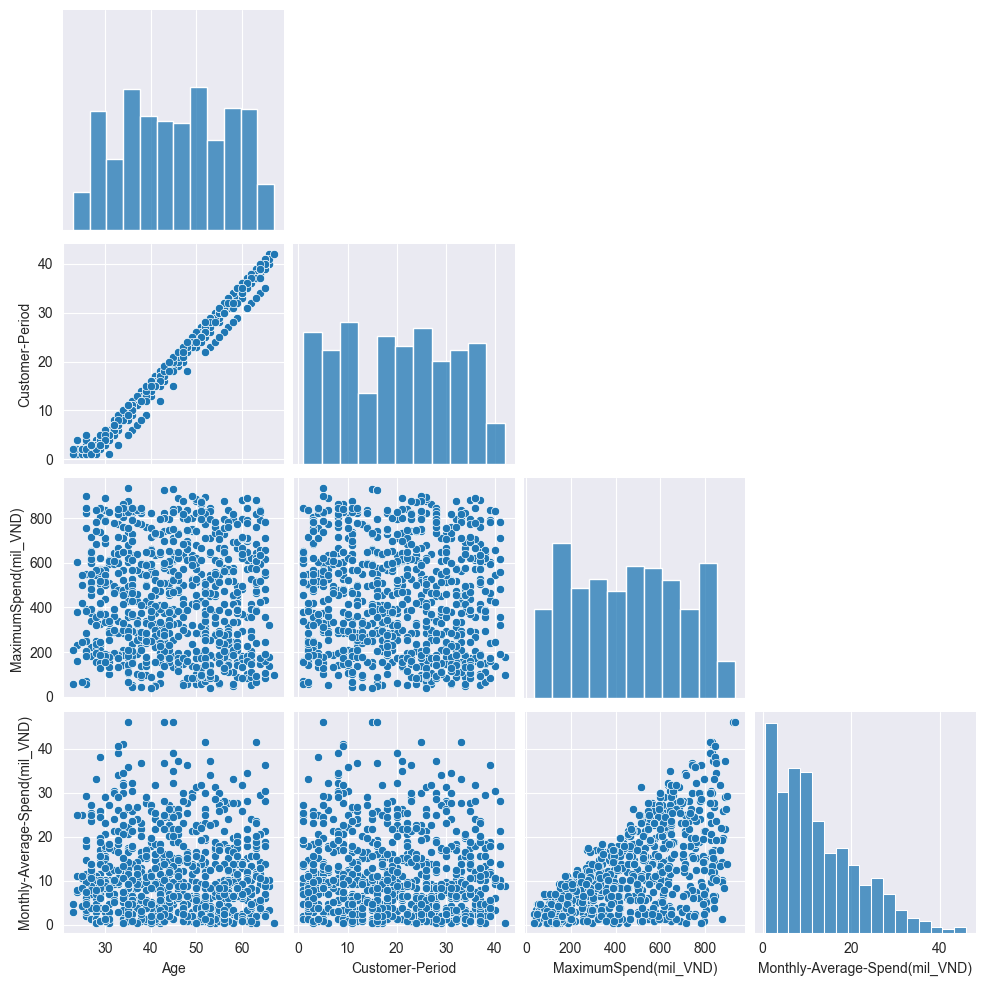

In [58]:

import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Age', 'Customer-Period', 'MaximumSpend(mil_VND)', 'Monthly-Average-Spend(mil_VND)']
sns.pairplot(df[numerical_columns], corner=True)
plt.show()


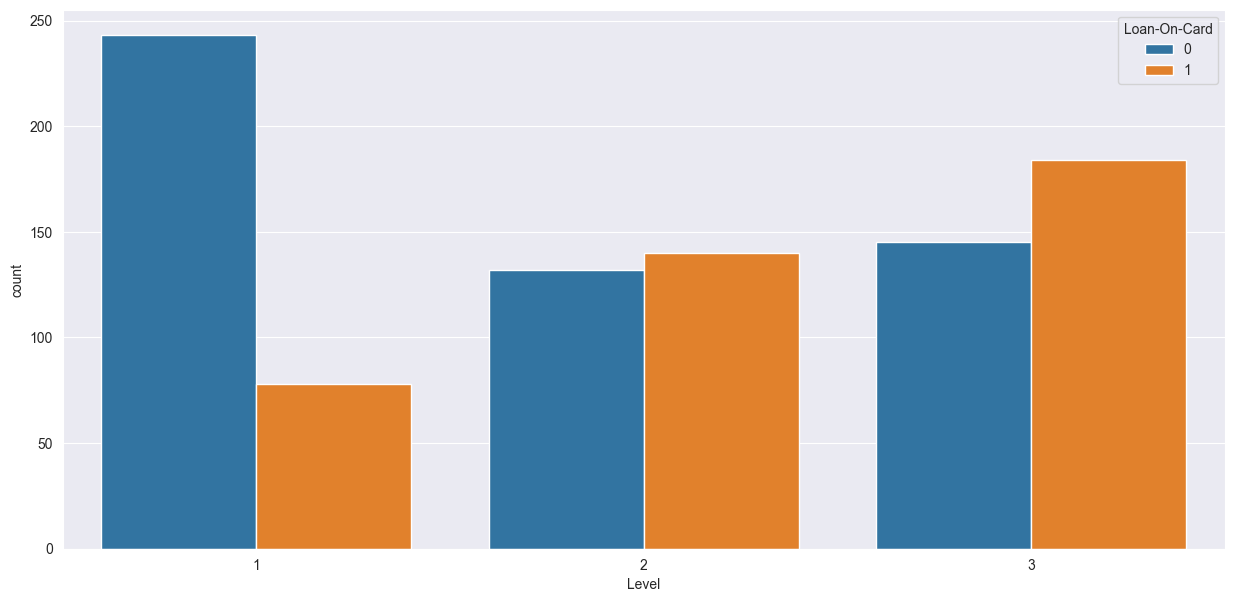

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Level', hue='Loan-On-Card')
plt.show()


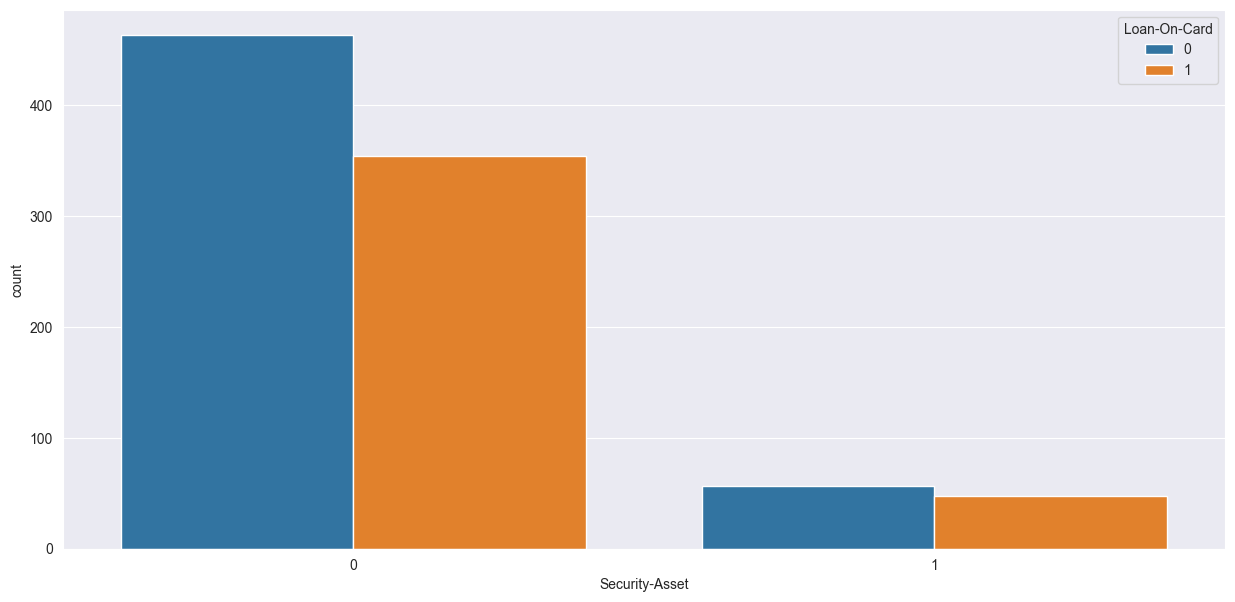

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Security-Asset', hue='Loan-On-Card')
plt.show()


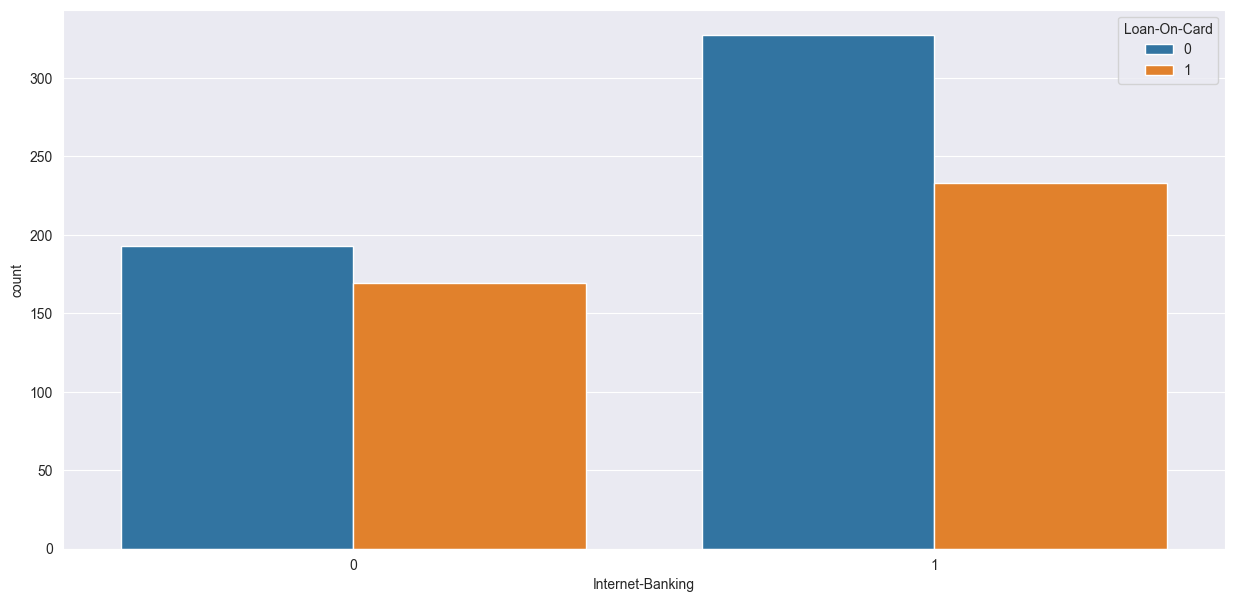

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Internet-Banking', hue='Loan-On-Card')
plt.show()


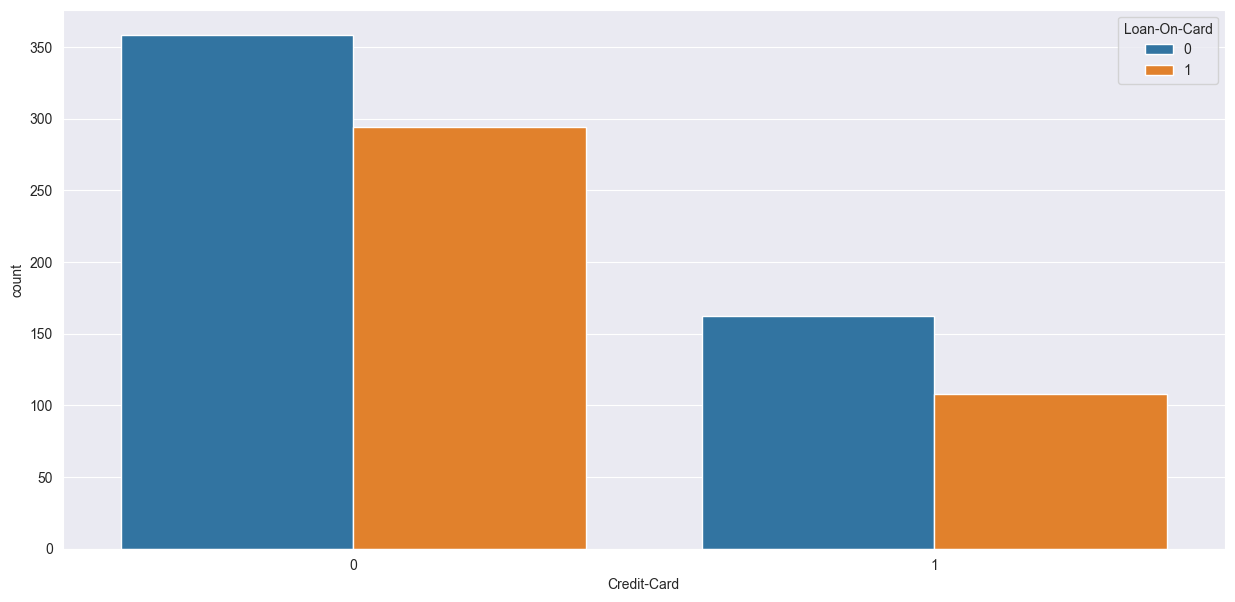

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Credit-Card', hue='Loan-On-Card')
plt.show()


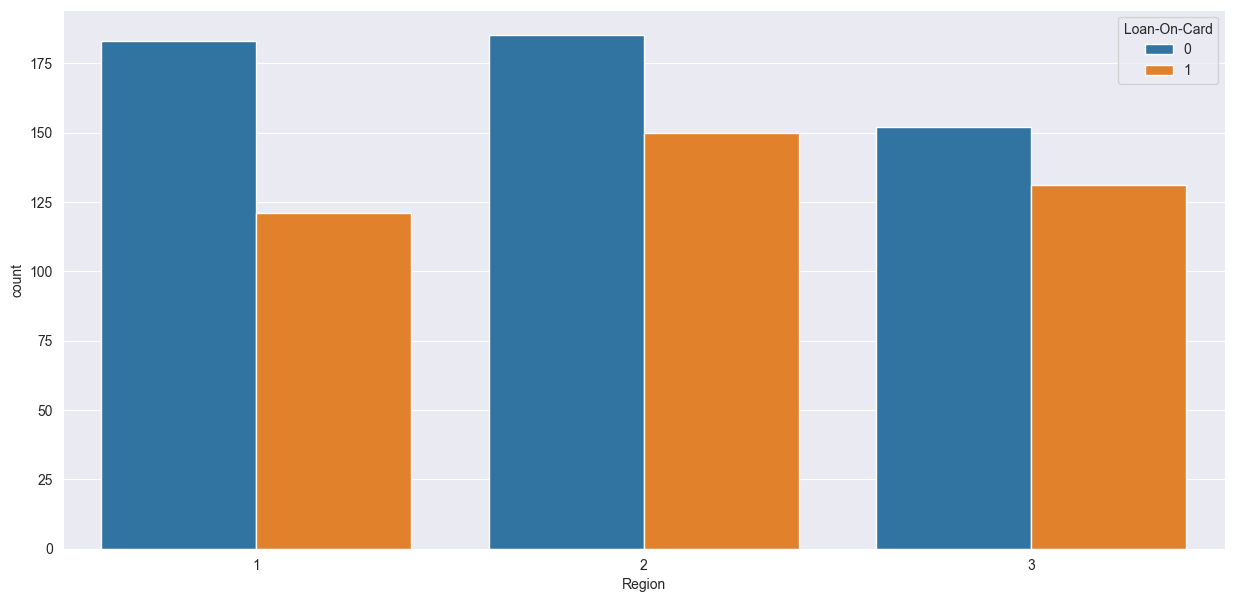

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Region', hue='Loan-On-Card')
plt.show()


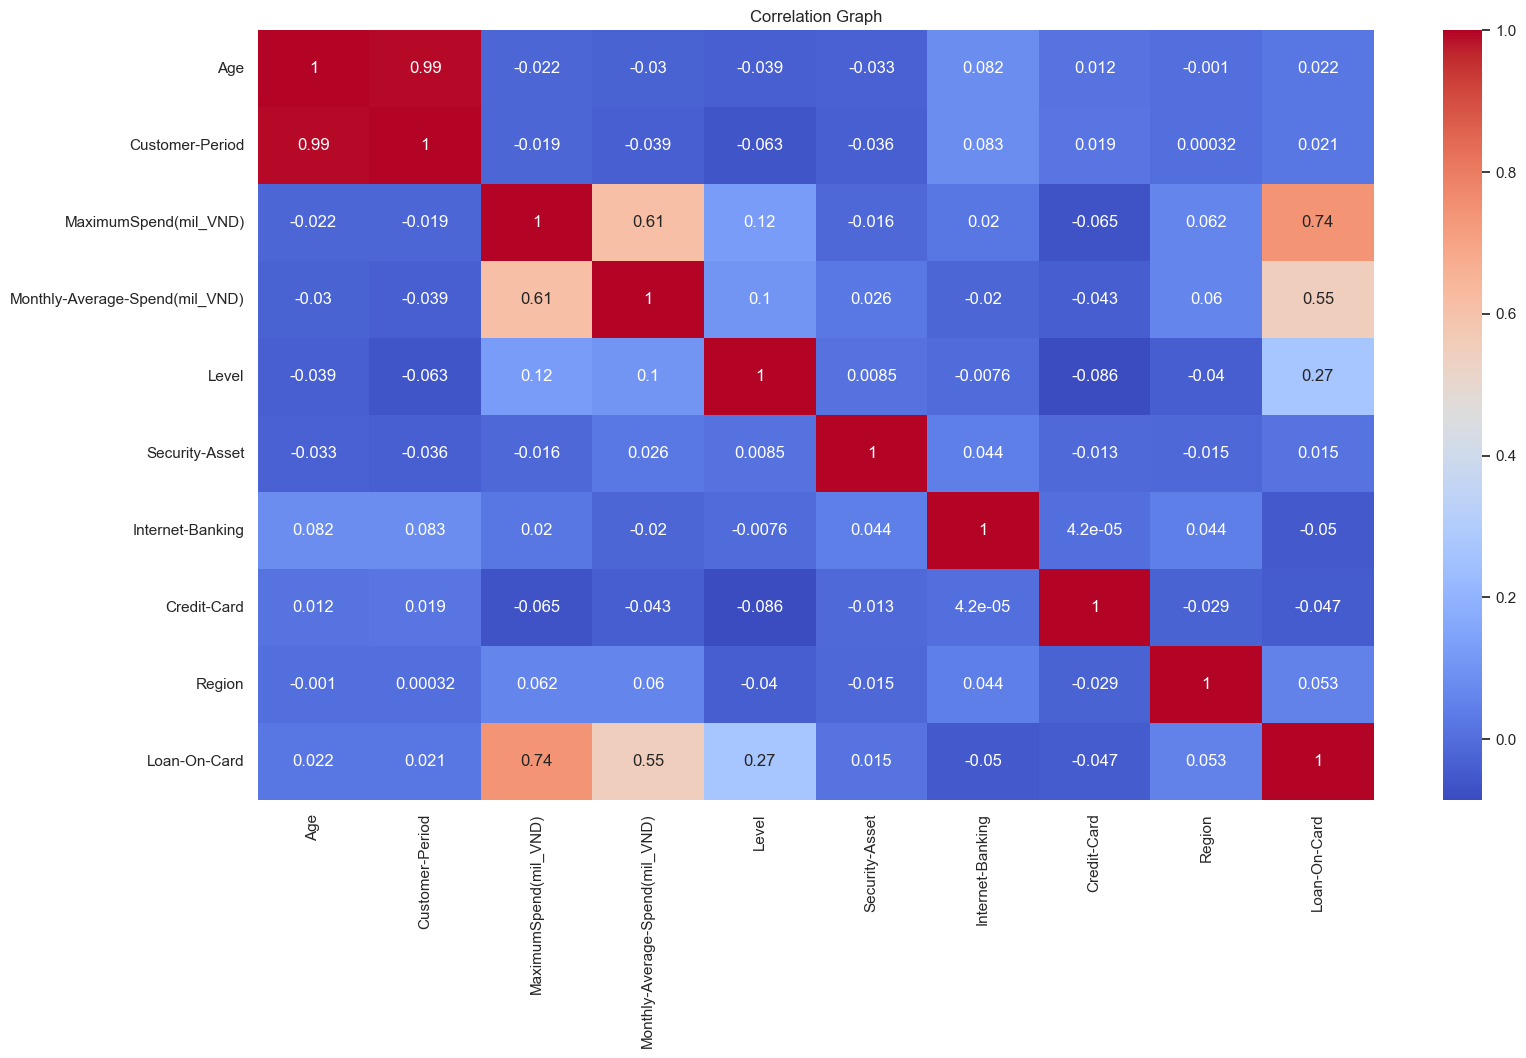

In [64]:
sns.set()
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Graph')
plt.show()

## 3.4 Hypothesis Testing

In [65]:
class_summary=df.groupby('Loan-On-Card') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,Loan-On-Card,Age,Customer-Period,MaximumSpend(mil_VND),Monthly-Average-Spend(mil_VND),Level,Security-Asset,Internet-Banking,Credit-Card,Region
0,0,45.078846,19.863462,302.140385,7.805315,1.811538,0.109615,0.628846,0.311538,1.940385
1,1,45.597015,20.355721,663.361194,18.201468,2.263682,0.119403,0.579602,0.268657,2.024876


In [66]:
features = df.drop(columns=['Loan-On-Card'])


In [67]:
col=list(features.select_dtypes(include=['int64','float64']).columns)
for i in col:
    x = np.array(df[df['Loan-On-Card'] == 0][i])
    y = np.array(df[df['Loan-On-Card'] == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False)
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.4958856835119174
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.5159048229582877
 Fail to Reject Null Hypothesis.Customer-Period of Loan holders and non-Loan holders are  same


 P_Value:4.228226433833391e-168
 Rejecting Null Hypothesis.MaximumSpend(mil_VND) of Loan holders and non-Loan holders are not same


 P_Value:6.20097542832131e-64
 Rejecting Null Hypothesis.Monthly-Average-Spend(mil_VND) of Loan holders and non-Loan holders are not same


 P_Value:7.086241814244726e-17
 Rejecting Null Hypothesis.Level of Loan holders and non-Loan holders are not same


 P_Value:0.6447326421619507
 Fail to Reject Null Hypothesis.Security-Asset of Loan holders and non-Loan holders are  same


 P_Value:0.13029022690317463
 Fail to Reject Null Hypothesis.Internet-Banking of Loan holders and non-Loan holders are  same


 P_Value:0.1539843178879028
 Fail to Reject Null Hypothesis.Credit-Card of Loan holders and non-Loan holders are  same


 

# 4.Model Training

## 4.1 Data Preprocessing

In [68]:
X = df.drop(columns=['Loan-On-Card'])
y = df['Loan-On-Card']


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler with training data and transform data
X_train = scaler.fit_transform(X_train)

# Apply with test set
X_test = scaler.transform(X_test)

## 4.2 Model Training and Evaluation


In [71]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

Evaluating Random Forest


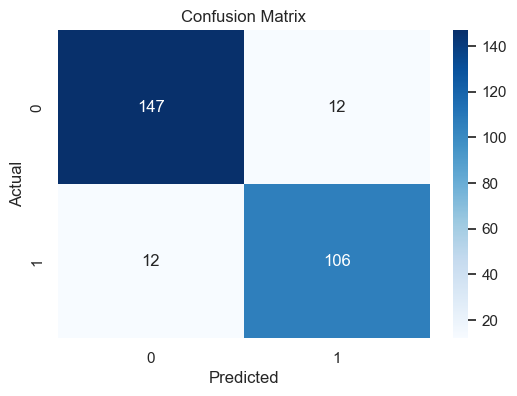

Random Forest Scores: {'Accuracy Score': 0.9133574007220217, 'Precision Score': np.float64(0.9133574007220217), 'Recall': np.float64(0.9133574007220217), 'F1': np.float64(0.9133574007220217)}

Evaluating Logistic Regression


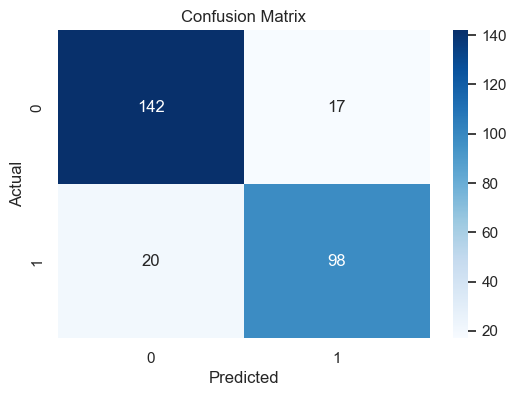

Logistic Regression Scores: {'Accuracy Score': 0.8664259927797834, 'Precision Score': np.float64(0.8661620653772593), 'Recall': np.float64(0.8664259927797834), 'F1': np.float64(0.8661902518821984)}

Evaluating KNN


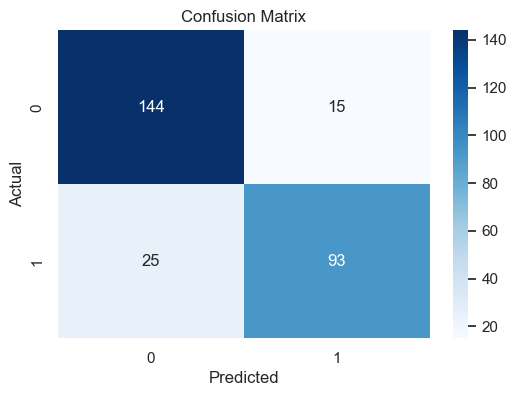

KNN Scores: {'Accuracy Score': 0.855595667870036, 'Precision Score': np.float64(0.8559220254582655), 'Recall': np.float64(0.855595667870036), 'F1': np.float64(0.8546021673117278)}



In [72]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = {
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'Precision Score': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return scores


model_scores = {}
for name, model in models.items():
    print(f"Evaluating {name}")
    scores = evaluate_model(model, X_train, y_train, X_test, y_test)
    model_scores[name] = scores
    print(f"{name} Scores: {scores}\n")
